In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, confusion_matrix
from sklearn import preprocessing

In [ ]:
INPUT_DIR = "data/"

In [ ]:
train = pd.read_csv(INPUT_DIR + "cars_sampled.csv")
train

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,3/4/2016 0:00,29690,5/4/2016 15:16
49997,27/03/2016 14:55,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,27/03/2016 0:00,50181,7/4/2016 11:45
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,15/03/2016 0:00,65232,6/4/2016 17:15


In [ ]:
train.shape

(50001, 19)

In [ ]:
train.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [ ]:
train.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [ ]:
train.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
postalCode              int64
lastSeen               object
dtype: object

In [ ]:
train.nunique()

dateCrawled            12039
name                   38766
seller                     2
offerType                  2
price                   2393
abtest                     2
vehicleType                8
yearOfRegistration        97
gearbox                    2
powerPS                  460
model                    248
kilometer                 13
monthOfRegistration       13
fuelType                   7
brand                     40
notRepairedDamage          2
dateCreated               75
postalCode              7018
lastSeen               10413
dtype: int64

In [ ]:
train["name"].unique()

array(['Zu_verkaufen', 'Volvo_XC90_2.4D_Summum', 'Volkswagen_Touran', ...,
       '[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift___Xenon_evtl._Cabrio',
       'Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten',
       'Chevrolet_Matiz_1.Hd_TÜV11/2017'], dtype=object)

In [ ]:
train["fuelType"].unique()

array(['diesel', 'petrol', nan, 'cng', 'lpg', 'hybrid', 'electro',
       'other'], dtype=object)

In [ ]:
train["seller"].unique()

array(['private', 'commercial'], dtype=object)

In [ ]:
train["yearOfRegistration"].unique()

array([2003, 2005, 2006, 2008, 1995, 1996, 1997, 2001, 2016, 1999, 1993,
       2002, 1998, 2017, 1992, 1991, 2000, 2011, 2004, 2009, 1979, 2010,
       2007, 1952, 1972, 1994, 2013, 2018, 2012, 1989, 2014, 2015, 1990,
       1988, 1970, 1961, 1960, 1966, 2019, 1983, 1964, 1971, 1975, 1987,
       1980, 1977, 1976, 1974, 1978, 1962, 1938, 1967, 1986, 1910, 1985,
       1959, 1982, 1981, 1984, 1950, 1945, 1965, 1958, 1973, 1955, 1956,
       1963, 1933, 1936, 1928, 9999, 1000, 1968, 1940, 1969, 1954, 1957,
       1934, 3500, 1929, 6000, 7500, 5000, 8500, 2900, 1943, 1951, 1500,
       3000, 7800, 2222, 1941, 3800, 1947, 1953, 1255, 8888], dtype=int64)

In [ ]:
train["monthOfRegistration"].unique()

array([ 3,  6, 11, 12,  2,  5,  4,  1,  9,  0, 10,  8,  7], dtype=int64)

In [ ]:
train["notRepairedDamage"].unique()

array([nan, 'no', 'yes'], dtype=object)

In [ ]:
train.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
postalCode              int64
lastSeen               object
dtype: object

<AxesSubplot:>

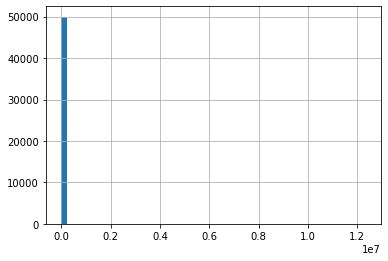

In [ ]:
train["price"].hist(bins=50)

<AxesSubplot:>

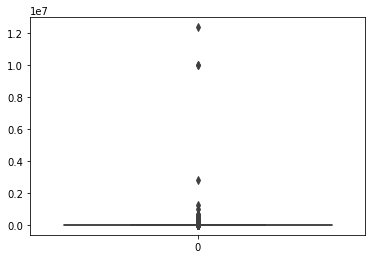

In [ ]:
sns.boxplot(data=train["price"])

In [ ]:
qrt25 = train["price"].quantile([0.25,0.5, 0.75])[0.25]
qrt75 = train["price"].quantile([0.25,0.5, 0.75])[0.75]

intr_qrt = qrt75 - qrt25

minimum_brd = qrt25 - (1.5 * intr_qrt)
maximum_brd = qrt75 + (1.5 * intr_qrt)

print(f" Нижняя граница: {minimum_brd}; Верхняя граница: {maximum_brd}")

 Нижняя граница: -7910.0; Верхняя граница: 16250.0


In [ ]:
train.drop(train[(train["price"] > maximum_brd)].index, inplace= True)
train

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
5,2/4/2016 12:51,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,988,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no,2/4/2016 0:00,26826,2/4/2016 12:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,23/03/2016 21:45,Opel_Astra_G_Caravan__Tuev_2/2018__Scheckheft_...,private,offer,2290,test,station wagon,2001,manual,101,astra,150000,3,petrol,opel,no,23/03/2016 0:00,27305,4/4/2016 1:47
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,3/4/2016 0:00,29690,5/4/2016 15:16
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,15/03/2016 0:00,65232,6/4/2016 17:15


<AxesSubplot:>

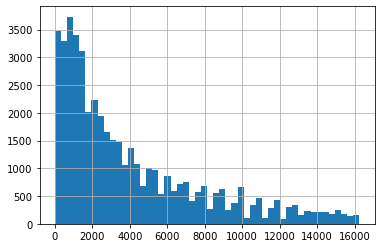

In [ ]:
train["price"].hist(bins=50)

<AxesSubplot:>

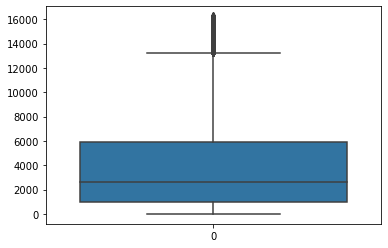

In [ ]:
sns.boxplot(data=train["price"])

<AxesSubplot:>

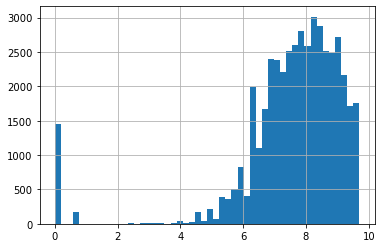

In [ ]:
train["price"] = np.log(train["price"] + 1)
train["price"].hist(bins=50)

<AxesSubplot:>

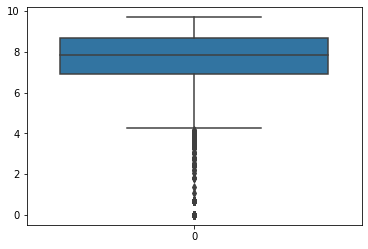

In [ ]:
sns.boxplot(data=train["price"])

Text(0.5, 1.0, 'Корреляционная матрица')

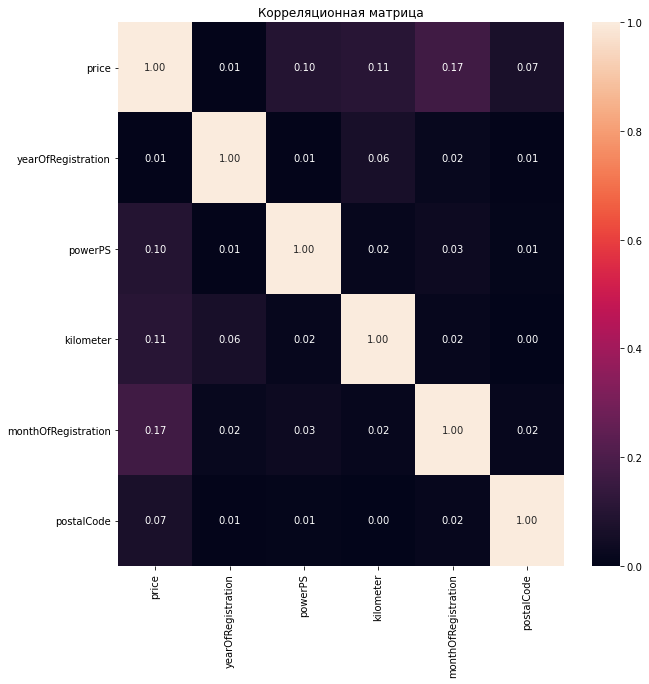

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr().abs(), vmin=0, vmax=1, annot=True, fmt=".2f")
plt.title('Корреляционная матрица')

In [ ]:
def getMinMaxBorder(col):
    qrt25 = train[col].quantile([0.25,0.5, 0.75])[0.25]
    qrt75 = train[col].quantile([0.25,0.5, 0.75])[0.75]

    intr_qrt = qrt75 - qrt25

    minimum_brd = qrt25 - (1.5 * intr_qrt)
    maximum_brd = qrt75 + (1.5 * intr_qrt)

    print(f" Нижняя граница столбца {col}: {minimum_brd}; Верхняя граница столбца {col}: {maximum_brd}")
    
    return (minimum_brd, maximum_brd)

<AxesSubplot:>

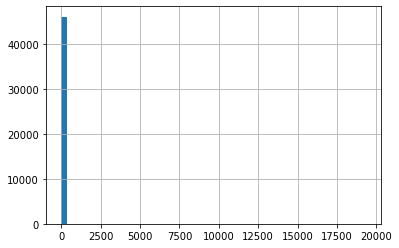

In [ ]:
train["powerPS"].hist(bins=50)

<AxesSubplot:>

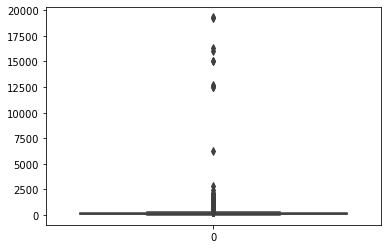

In [ ]:
sns.boxplot(data=train["powerPS"])

In [ ]:
train.drop(train[(train["powerPS"] > getMinMaxBorder("powerPS")[1])].index, inplace= True)
train

 Нижняя граница столбца powerPS: -40.0; Верхняя граница столбца powerPS: 248.0


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,8.400884,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,9.495519,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,8.071219,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,8.412055,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
5,2/4/2016 12:51,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,6.896694,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no,2/4/2016 0:00,26826,2/4/2016 12:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,23/03/2016 21:45,Opel_Astra_G_Caravan__Tuev_2/2018__Scheckheft_...,private,offer,7.736744,test,station wagon,2001,manual,101,astra,150000,3,petrol,opel,no,23/03/2016 0:00,27305,4/4/2016 1:47
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0.000000,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,3/4/2016 0:00,29690,5/4/2016 15:16
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0.000000,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,4.615121,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,15/03/2016 0:00,65232,6/4/2016 17:15


<AxesSubplot:>

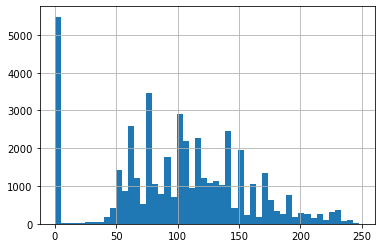

In [ ]:
train["powerPS"].hist(bins=50)

<AxesSubplot:>

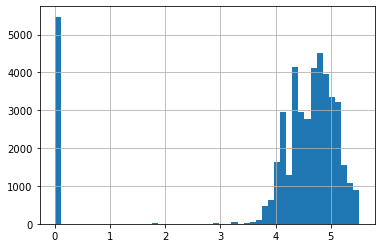

In [ ]:
train["powerPS"] = np.log(train["powerPS"] + 1)
train["powerPS"].hist(bins=50)

<AxesSubplot:>

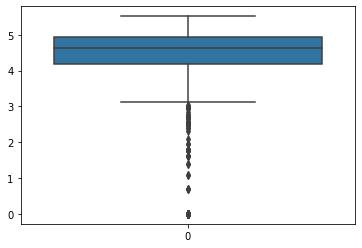

In [ ]:
sns.boxplot(data=train["powerPS"])

<AxesSubplot:>

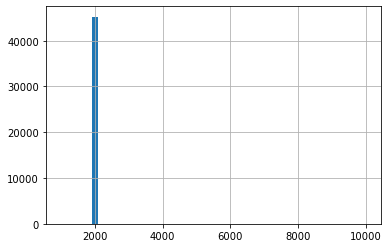

In [ ]:
train["yearOfRegistration"].hist(bins=50)

<AxesSubplot:>

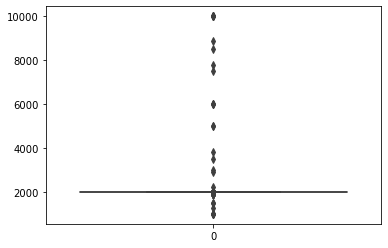

In [ ]:
sns.boxplot(data=train["yearOfRegistration"])

In [ ]:
train.drop(train[(train["yearOfRegistration"] < getMinMaxBorder("yearOfRegistration")[0]) | (train["yearOfRegistration"] > getMinMaxBorder("yearOfRegistration")[1])].index, inplace= True)
train

 Нижняя граница столбца yearOfRegistration: 1987.0; Верхняя граница столбца yearOfRegistration: 2019.0
 Нижняя граница столбца yearOfRegistration: 1987.0; Верхняя граница столбца yearOfRegistration: 2019.0


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,8.400884,test,limousine,2003,manual,5.017280,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,9.495519,control,suv,2005,manual,5.099866,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,8.071219,test,bus,2003,manual,4.624973,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,8.412055,control,small car,2006,manual,4.465908,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
5,2/4/2016 12:51,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,6.896694,test,limousine,1995,manual,4.510860,passat,150000,2,petrol,volkswagen,no,2/4/2016 0:00,26826,2/4/2016 12:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,23/03/2016 21:45,Opel_Astra_G_Caravan__Tuev_2/2018__Scheckheft_...,private,offer,7.736744,test,station wagon,2001,manual,4.624973,astra,150000,3,petrol,opel,no,23/03/2016 0:00,27305,4/4/2016 1:47
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0.000000,test,bus,2005,NaN,0.000000,transporter,150000,0,NaN,volkswagen,NaN,3/4/2016 0:00,29690,5/4/2016 15:16
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0.000000,test,coupe,2004,manual,0.000000,3er,150000,1,petrol,bmw,no,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,4.615121,control,station wagon,2000,manual,0.000000,megane,150000,8,petrol,renault,NaN,15/03/2016 0:00,65232,6/4/2016 17:15


<AxesSubplot:>

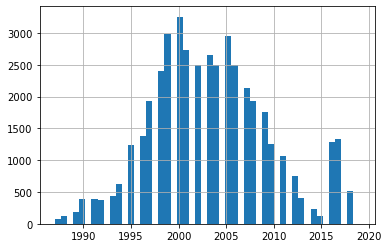

In [ ]:
train["yearOfRegistration"].hist(bins=50)

<AxesSubplot:>

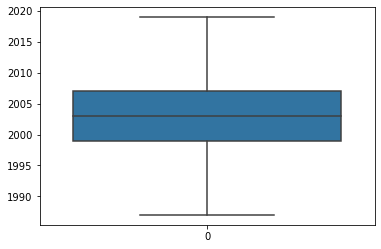

In [ ]:
sns.boxplot(data=train["yearOfRegistration"])

<AxesSubplot:>

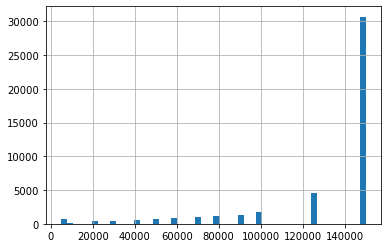

In [ ]:
train["kilometer"].hist(bins=50)

<AxesSubplot:>

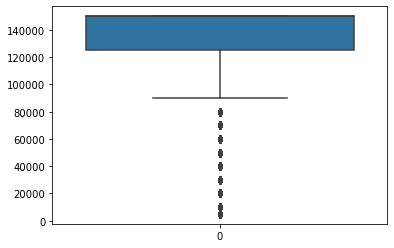

In [ ]:
sns.boxplot(data=train["kilometer"])

In [ ]:
train.drop(train[(train["kilometer"] < getMinMaxBorder("kilometer")[0]) | (train["kilometer"] > getMinMaxBorder("kilometer")[1])].index, inplace= True)
train

 Нижняя граница столбца kilometer: 87500.0; Верхняя граница столбца kilometer: 187500.0
 Нижняя граница столбца kilometer: 87500.0; Верхняя граница столбца kilometer: 187500.0


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,8.400884,test,limousine,2003,manual,5.017280,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,9.495519,control,suv,2005,manual,5.099866,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,8.071219,test,bus,2003,manual,4.624973,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
5,2/4/2016 12:51,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,6.896694,test,limousine,1995,manual,4.510860,passat,150000,2,petrol,volkswagen,no,2/4/2016 0:00,26826,2/4/2016 12:51
6,3/4/2016 11:06,Opel_astra,private,offer,5.993961,test,station wagon,1996,manual,0.000000,astra,150000,5,petrol,opel,NaN,3/4/2016 0:00,56422,6/4/2016 16:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,23/03/2016 21:45,Opel_Astra_G_Caravan__Tuev_2/2018__Scheckheft_...,private,offer,7.736744,test,station wagon,2001,manual,4.624973,astra,150000,3,petrol,opel,no,23/03/2016 0:00,27305,4/4/2016 1:47
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0.000000,test,bus,2005,NaN,0.000000,transporter,150000,0,NaN,volkswagen,NaN,3/4/2016 0:00,29690,5/4/2016 15:16
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0.000000,test,coupe,2004,manual,0.000000,3er,150000,1,petrol,bmw,no,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,4.615121,control,station wagon,2000,manual,0.000000,megane,150000,8,petrol,renault,NaN,15/03/2016 0:00,65232,6/4/2016 17:15


<AxesSubplot:>

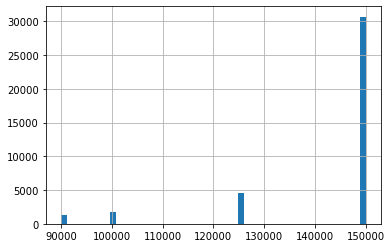

In [ ]:
train["kilometer"].hist(bins=50)

<AxesSubplot:>

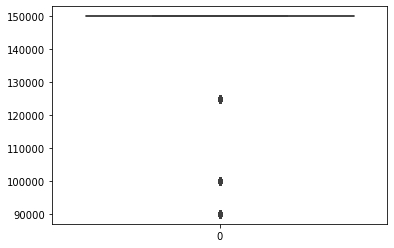

In [ ]:
sns.boxplot(data=train["kilometer"])

<AxesSubplot:>

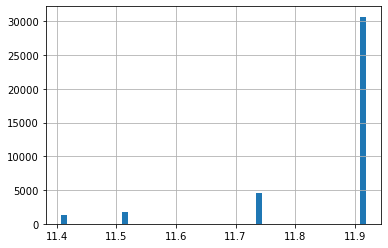

In [ ]:
train["kilometer"] = np.log(train["kilometer"] + 1)
train["kilometer"].hist(bins=50)

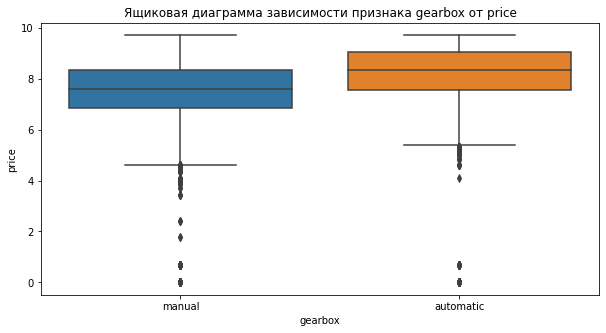

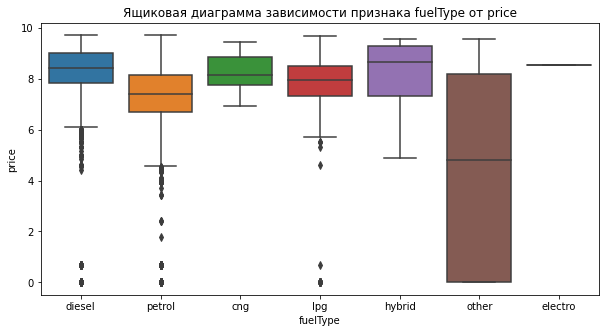

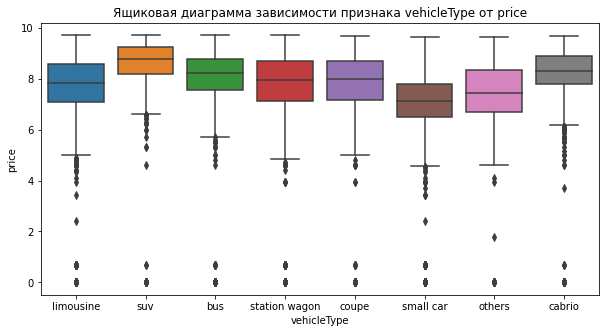

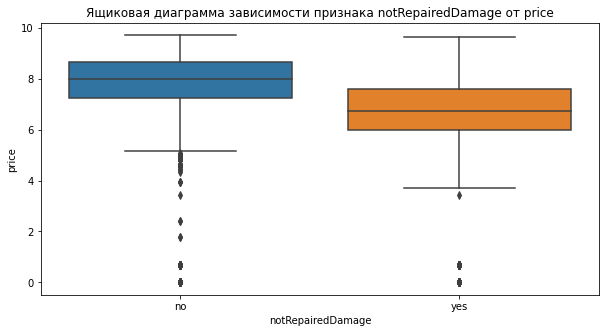

In [ ]:
for col in ["gearbox", "fuelType", "vehicleType", "notRepairedDamage"]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=col, y="price", data=train)
    plt.title(f"Ящиковая диаграмма зависимости признака {col} от price")

#### Выводы по ящиковым диаграммам: 
    1) Вывод по признаку gearbox: машины со значением automatic стоят дороже, чем manual.
    
    2) Вывод по признаку fuelType:  в среднем, машины со значением diesel стоят дороже всех остальных. Можно увидеть, что машины со значением other распределены почти по всему ценновому диапазону (стоимость машин со значениями other есть и дешевая, а есть и дорогая)
    
    3) Вывод по признаку vehicleType: в среднем, машины со значением suv стоят дороже всех остальных. Можно увидеть, что машины со значением small call стоят дешевле всех остальных. 
    
    4) Вывод по признаку notRepairedDamage: машины со значением no стоят дороже, чем yes.

In [ ]:
for col in ["gearbox", "fuelType", "vehicleType", "notRepairedDamage"]:
    plt.figure(figsize=(8,5))
    train[col].hist(bins=50)
    plt.title(f"Рaспределение признака {col}", size = 15)
    plt.xlabel(col, size = 12)
    plt.ylabel("Частота", size = 12)

In [ ]:
train.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            4204
yearOfRegistration        0
gearbox                2060
powerPS                   0
model                  1950
kilometer                 0
monthOfRegistration       0
fuelType               3502
brand                     0
notRepairedDamage      8019
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [ ]:
train = train.drop(columns="notRepairedDamage")
train

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,8.400884,test,limousine,2003,manual,5.017280,3er,11.918397,3,diesel,bmw,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,9.495519,control,suv,2005,manual,5.099866,xc_reihe,11.918397,6,diesel,volvo,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,8.071219,test,bus,2003,manual,4.624973,touran,11.918397,11,diesel,volkswagen,31/03/2016 0:00,27449,1/4/2016 8:40
5,2/4/2016 12:51,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,6.896694,test,limousine,1995,manual,4.510860,passat,11.918397,2,petrol,volkswagen,2/4/2016 0:00,26826,2/4/2016 12:51
6,3/4/2016 11:06,Opel_astra,private,offer,5.993961,test,station wagon,1996,manual,0.000000,astra,11.918397,5,petrol,opel,3/4/2016 0:00,56422,6/4/2016 16:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,23/03/2016 21:45,Opel_Astra_G_Caravan__Tuev_2/2018__Scheckheft_...,private,offer,7.736744,test,station wagon,2001,manual,4.624973,astra,11.918397,3,petrol,opel,23/03/2016 0:00,27305,4/4/2016 1:47
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0.000000,test,bus,2005,NaN,0.000000,transporter,11.918397,0,NaN,volkswagen,3/4/2016 0:00,29690,5/4/2016 15:16
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0.000000,test,coupe,2004,manual,0.000000,3er,11.918397,1,petrol,bmw,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,4.615121,control,station wagon,2000,manual,0.000000,megane,11.918397,8,petrol,renault,15/03/2016 0:00,65232,6/4/2016 17:15


In [ ]:
train["vehicleType"].fillna(train["vehicleType"].mode()[0], inplace=True)
train["gearbox"].fillna(train["gearbox"].mode()[0], inplace=True)
train["model"].fillna(train["model"].mode()[0], inplace=True)
train["fuelType"].fillna(train["fuelType"].mode()[0], inplace=True)

In [ ]:
train.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64

In [ ]:
train.to_csv(INPUT_DIR + "cars_sampled_good_dataset.csv", index = False)

In [ ]:
good_dataset_test = pd.read_csv(INPUT_DIR + "cars_sampled_good_dataset.csv")
good_dataset_test

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,8.400884,test,limousine,2003,manual,5.017280,3er,11.918397,3,diesel,bmw,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,9.495519,control,suv,2005,manual,5.099866,xc_reihe,11.918397,6,diesel,volvo,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,8.071219,test,bus,2003,manual,4.624973,touran,11.918397,11,diesel,volkswagen,31/03/2016 0:00,27449,1/4/2016 8:40
3,2/4/2016 12:51,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,6.896694,test,limousine,1995,manual,4.510860,passat,11.918397,2,petrol,volkswagen,2/4/2016 0:00,26826,2/4/2016 12:51
4,3/4/2016 11:06,Opel_astra,private,offer,5.993961,test,station wagon,1996,manual,0.000000,astra,11.918397,5,petrol,opel,3/4/2016 0:00,56422,6/4/2016 16:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38394,23/03/2016 21:45,Opel_Astra_G_Caravan__Tuev_2/2018__Scheckheft_...,private,offer,7.736744,test,station wagon,2001,manual,4.624973,astra,11.918397,3,petrol,opel,23/03/2016 0:00,27305,4/4/2016 1:47
38395,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0.000000,test,bus,2005,manual,0.000000,transporter,11.918397,0,petrol,volkswagen,3/4/2016 0:00,29690,5/4/2016 15:16
38396,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0.000000,test,coupe,2004,manual,0.000000,3er,11.918397,1,petrol,bmw,14/03/2016 0:00,86956,25/03/2016 6:17
38397,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,4.615121,control,station wagon,2000,manual,0.000000,megane,11.918397,8,petrol,renault,15/03/2016 0:00,65232,6/4/2016 17:15
